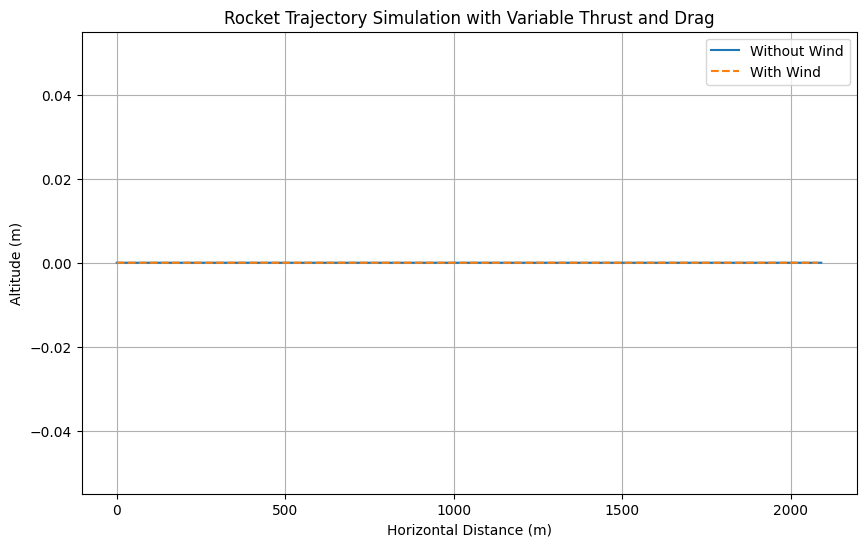

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravity (m/s^2)
rho = 1.225  # Air density at sea level (kg/m^3)
Cd = 0.75  # Drag coefficient (typical for rockets)
A = 0.03  # Cross-sectional area (m^2)
mass_initial = 50.0  # Initial mass (kg)
burn_time = 10.0  # Burn time of the rocket engine (s)

# Thrust as a function of time (variable thrust)
def thrust(t):
    if t < burn_time:
        return 1500 * (1 - t / burn_time)  # Thrust decreases linearly over burn time
    else:
        return 0

# Wind speed as function of time (m/s)
def wind(t):
    # Example: sinusoidal wind with max 5 m/s gusts
    return 5 * np.sin(0.5 * t)

# Simulation parameters
dt = 0.01  # Time step (s)
t_max = 50  # Total simulation time (s)

# Initialize variables
t_values = [0]
x_values = [0]
y_values = [0]
vx_values = [0]
vy_values = [0]
mass = mass_initial

# Function to compute drag force
def drag(vx, vy):
    v = np.sqrt(vx**2 + vy**2)
    if v == 0:
        return 0, 0
    Fd = 0.5 * rho * v**2 * Cd * A
    # Drag force components opposite to velocity direction
    Fdx = -Fd * (vx / v)
    Fdy = -Fd * (vy / v)
    return Fdx, Fdy

# Simulation loop WITH wind
def simulate(with_wind=True):
    t = 0
    x, y = 0, 0
    vx, vy = 0, 0
    m = mass_initial

    xs, ys = [], []
    vxs, vys = [], []

    while t < t_max and y >= 0:
        # Current thrust
        T = thrust(t)

        # Wind velocity (horizontal)
        w = wind(t) if with_wind else 0

        # Relative velocity of rocket wrt air (consider wind)
        v_rel_x = vx - w
        v_rel_y = vy

        # Drag forces
        Fdx, Fdy = drag(v_rel_x, v_rel_y)

        # Forces
        Fx = T + Fdx  # Thrust + drag (x)
        Fy = -m * g + Fdy  # Gravity + drag (y)

        # Acceleration
        ax = Fx / m
        ay = Fy / m

        # Update velocity
        vx += ax * dt
        vy += ay * dt

        # Update position
        x += vx * dt
        y += vy * dt
        y = max(y, 0)  # No underground

        # Mass decreases during burn
        if t < burn_time:
            m -= (mass_initial / burn_time) * dt
            m = max(m, 10)  # Don't go below dry mass ~10kg

        # Save values
        xs.append(x)
        ys.append(y)
        vxs.append(vx)
        vys.append(vy)
        t += dt

    return xs, ys

# Run simulations
x_no_wind, y_no_wind = simulate(with_wind=False)
x_wind, y_wind = simulate(with_wind=True)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(x_no_wind, y_no_wind, label='Without Wind')
plt.plot(x_wind, y_wind, label='With Wind', linestyle='--')
plt.title("Rocket Trajectory Simulation with Variable Thrust and Drag")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Altitude (m)")
plt.legend()
plt.grid(True)
plt.show()


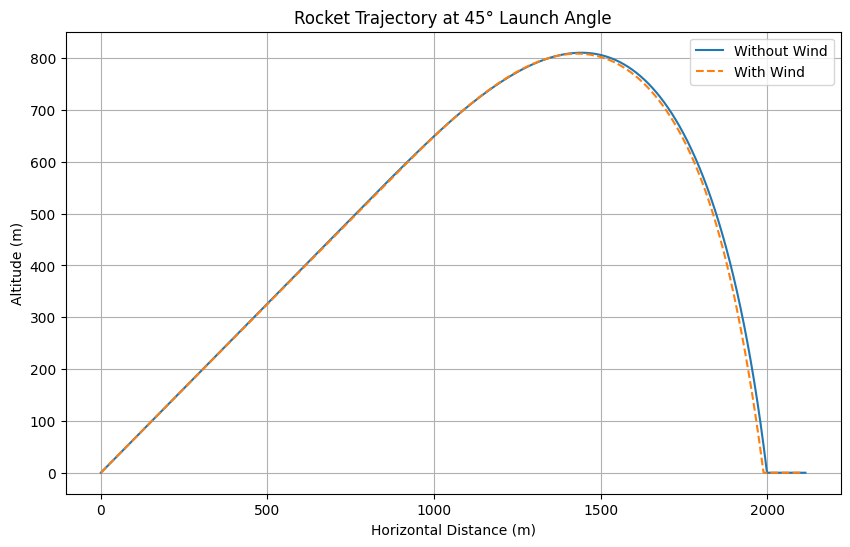

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravity (m/s^2)
rho = 1.225  # Air density (kg/m^3)
Cd = 0.75  # Drag coefficient
A = 0.03  # Cross-sectional area (m^2)
mass_initial = 50.0  # Initial mass (kg)
burn_time = 10.0  # Burn time (s)
launch_angle_deg = 45  # Launch angle in degrees

# Convert to radians
launch_angle = np.radians(launch_angle_deg)

def thrust(t):
    if t < burn_time:
        return 2000 * (1 - t / burn_time)  # Adjusted thrust magnitude
    else:
        return 0

def wind(t):
    return 5 * np.sin(0.5 * t)

dt = 0.01
t_max = 50

def drag(vx, vy):
    v = np.sqrt(vx**2 + vy**2)
    if v == 0:
        return 0, 0
    Fd = 0.5 * rho * v**2 * Cd * A
    return -Fd * (vx / v), -Fd * (vy / v)

def simulate(with_wind=True):
    t = 0
    x, y = 0, 0
    vx, vy = 0, 0
    m = mass_initial

    xs, ys = [], []

    while t < t_max and y >= 0:
        T = thrust(t)

        # Thrust components along launch angle
        Tx = T * np.cos(launch_angle)
        Ty = T * np.sin(launch_angle)

        w = wind(t) if with_wind else 0
        v_rel_x = vx - w
        v_rel_y = vy

        Fdx, Fdy = drag(v_rel_x, v_rel_y)

        Fx = Tx + Fdx
        Fy = Ty - m * g + Fdy

        ax = Fx / m
        ay = Fy / m

        vx += ax * dt
        vy += ay * dt

        x += vx * dt
        y += vy * dt
        y = max(y, 0)

        if t < burn_time:
            m -= (mass_initial / burn_time) * dt
            m = max(m, 10)

        xs.append(x)
        ys.append(y)

        t += dt

    return xs, ys

x_no_wind, y_no_wind = simulate(with_wind=False)
x_wind, y_wind = simulate(with_wind=True)

plt.figure(figsize=(10,6))
plt.plot(x_no_wind, y_no_wind, label='Without Wind')
plt.plot(x_wind, y_wind, label='With Wind', linestyle='--')
plt.title(f"Rocket Trajectory at {launch_angle_deg}° Launch Angle")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Altitude (m)")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

# Constants
g = 9.81
rho = 1.225
Cd = 0.75
A = 0.03
mass_initial = 50.0
burn_time = 10.0

dt = 0.01
t_max = 50

def thrust(t, max_thrust):
    if t < burn_time:
        return max_thrust * (1 - t / burn_time)
    else:
        return 0

def wind(t):
    return 5 * np.sin(0.5 * t)

def drag(vx, vy):
    v = np.sqrt(vx**2 + vy**2)
    if v == 0:
        return 0, 0
    Fd = 0.5 * rho * v**2 * Cd * A
    return -Fd * (vx / v), -Fd * (vy / v)

def simulate(launch_angle_deg, max_thrust, with_wind=True):
    launch_angle = np.radians(launch_angle_deg)
    t = 0
    x, y = 0, 0
    vx, vy = 0, 0
    m = mass_initial

    xs, ys = [], []

    while t < t_max and y >= 0:
        T = thrust(t, max_thrust)

        Tx = T * np.cos(launch_angle)
        Ty = T * np.sin(launch_angle)

        w = wind(t) if with_wind else 0
        v_rel_x = vx - w
        v_rel_y = vy

        Fdx, Fdy = drag(v_rel_x, v_rel_y)

        Fx = Tx + Fdx
        Fy = Ty - m * g + Fdy

        ax = Fx / m
        ay = Fy / m

        vx += ax * dt
        vy += ay * dt

        x += vx * dt
        y += vy * dt
        y = max(y, 0)

        if t < burn_time:
            m -= (mass_initial / burn_time) * dt
            m = max(m, 10)

        xs.append(x)
        ys.append(y)

        t += dt

    return xs, ys

def plot_trajectory(launch_angle_deg=45.0, max_thrust=2000.0):
    x_no_wind, y_no_wind = simulate(launch_angle_deg, max_thrust, with_wind=False)
    x_wind, y_wind = simulate(launch_angle_deg, max_thrust, with_wind=True)

    plt.figure(figsize=(10,6))
    plt.plot(x_no_wind, y_no_wind, label='Without Wind')
    plt.plot(x_wind, y_wind, label='With Wind', linestyle='--')
    plt.title(f"Rocket Trajectory at {launch_angle_deg:.1f}° Launch Angle\nMax Thrust = {max_thrust:.0f} N")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Altitude (m)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders
interact(plot_trajectory,
         launch_angle_deg=FloatSlider(value=45, min=10, max=80, step=1, description='Launch Angle (°)'),
         max_thrust=FloatSlider(value=2000, min=500, max=4000, step=100, description='Max Thrust (N)'));


interactive(children=(FloatSlider(value=45.0, description='Launch Angle (°)', max=80.0, min=10.0, step=1.0), F…

In [44]:
!pip install numpy matplotlib scipy


Optimal Launch Angle: 31.54 degrees
Optimal Max Thrust: 2000.67 N
Maximum Horizontal Distance: 2133.30 meters


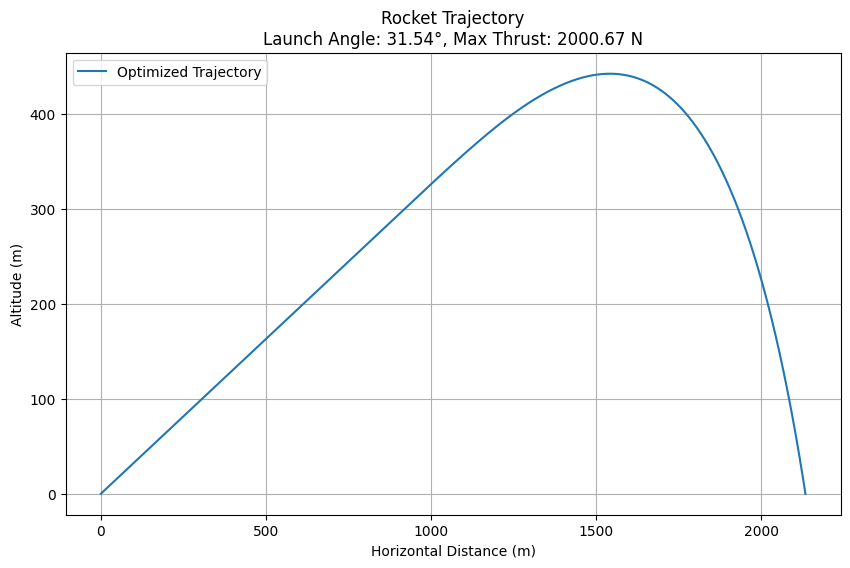

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
g = 9.81           # Gravity (m/s^2)
rho = 1.225        # Air density (kg/m^3)
Cd = 0.75          # Drag coefficient
A = 0.03           # Cross-sectional area (m^2)
mass_initial = 50.0  # Initial mass (kg)
burn_time = 10.0   # Burn time (s)
dt = 0.01          # Time step (s)
t_max = 50         # Max simulation time (s)

def simulate_range(launch_angle_deg, max_thrust):
    launch_angle = np.radians(launch_angle_deg)
    t = 0.0
    x, y = 0.0, 0.0
    vx, vy = 0.0, 0.0
    m = mass_initial

    def thrust(t_local):
        if t_local < burn_time:
            return max_thrust * (1 - t_local / burn_time)
        else:
            return 0.0

    def drag(vx_local, vy_local):
        v = np.sqrt(vx_local**2 + vy_local**2)
        if v == 0:
            return 0.0, 0.0
        Fd = 0.5 * rho * v**2 * Cd * A
        return -Fd * (vx_local / v), -Fd * (vy_local / v)

    while t < t_max:
        T = thrust(t)
        Tx = T * np.cos(launch_angle)
        Ty = T * np.sin(launch_angle)

        Fdx, Fdy = drag(vx, vy)

        Fx = Tx + Fdx
        Fy = Ty - m * g + Fdy

        ax = Fx / m
        ay = Fy / m

        vx += ax * dt
        vy += ay * dt

        x_new = x + vx * dt
        y_new = y + vy * dt

        if y_new < 0:
            break  # Rocket has landed

        x, y = x_new, y_new

        if t < burn_time:
            m -= (mass_initial / burn_time) * dt
            m = max(m, 10)

        t += dt

    return x  # Horizontal distance

def objective(params):
    launch_angle_deg, max_thrust = params
    if not (10 <= launch_angle_deg <= 80 and 500 <= max_thrust <= 4000):
        return 1e6  # Penalize invalid values
    return -simulate_range(launch_angle_deg, max_thrust)  # Negative to maximize

# Initial guess and bounds
x0 = [45.0, 2000.0]
bounds = [(10, 80), (500, 4000)]

result = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')

best_angle, best_thrust = result.x
max_distance = -result.fun

print(f"Optimal Launch Angle: {best_angle:.2f} degrees")
print(f"Optimal Max Thrust: {best_thrust:.2f} N")
print(f"Maximum Horizontal Distance: {max_distance:.2f} meters")

def plot_trajectory(angle_deg, thrust_val):
    launch_angle = np.radians(angle_deg)
    t = 0.0
    x, y = 0.0, 0.0
    vx, vy = 0.0, 0.0
    m = mass_initial

    xs, ys = [], []

    def thrust(t_local):
        if t_local < burn_time:
            return thrust_val * (1 - t_local / burn_time)
        else:
            return 0.0

    def drag(vx_local, vy_local):
        v = np.sqrt(vx_local**2 + vy_local**2)
        if v == 0:
            return 0.0, 0.0
        Fd = 0.5 * rho * v**2 * Cd * A
        return -Fd * (vx_local / v), -Fd * (vy_local / v)

    while t < t_max:
        T = thrust(t)
        Tx = T * np.cos(launch_angle)
        Ty = T * np.sin(launch_angle)

        Fdx, Fdy = drag(vx, vy)

        Fx = Tx + Fdx
        Fy = Ty - m * g + Fdy

        ax = Fx / m
        ay = Fy / m

        vx += ax * dt
        vy += ay * dt

        x_new = x + vx * dt
        y_new = y + vy * dt

        if y_new < 0:
            break

        x, y = x_new, y_new

        xs.append(x)
        ys.append(y)

        if t < burn_time:
            m -= (mass_initial / burn_time) * dt
            m = max(m, 10)

        t += dt

    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, label='Optimized Trajectory')
    plt.title(f"Rocket Trajectory\nLaunch Angle: {angle_deg:.2f}°, Max Thrust: {thrust_val:.2f} N")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Altitude (m)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_trajectory(best_angle, best_thrust)
